# Predicción de deserción de un empleado

In [2]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Descargar el dataset

handle = 'raminhuseyn/hr-analytics-data-set'

api.dataset_download_files(handle, path='../data/raw', unzip=True)


OSError: Could not find kaggle.json. Make sure it's located in /home/vscode/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [53]:
import pandas as pd

df = pd.read_csv('../data/raw/HR_capstone_dataset.csv')

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:

# Mapear los valores de la columna 'left'
mapping_left = {1: 'yes', 0: 'no'}
df['left_categorical'] = df['left'].map(mapping_left)

# Mapear los valores de la columna 'Work_accident'
mapping_accident = {1: 'yes', 0: 'no'}
df['Work_accident_categorical'] = df['Work_accident'].map(mapping_accident)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   satisfaction_level         14999 non-null  float64
 1   last_evaluation            14999 non-null  float64
 2   number_project             14999 non-null  int64  
 3   average_montly_hours       14999 non-null  int64  
 4   time_spend_company         14999 non-null  int64  
 5   Work_accident              14999 non-null  int64  
 6   left                       14999 non-null  int64  
 7   promotion_last_5years      14999 non-null  int64  
 8   Department                 14999 non-null  object 
 9   salary                     14999 non-null  object 
 10  left_categorical           14999 non-null  object 
 11  Work_accident_categorical  14999 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 1.4+ MB


In [56]:
df = df.drop(columns=['left', 'Work_accident'])
df = df.rename(columns={'left_categorical': 'left',
                       'Work_accident_categorical': 'Work_accident'})


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   Department             14999 non-null  object 
 7   salary                 14999 non-null  object 
 8   left                   14999 non-null  object 
 9   Work_accident          14999 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [ ]:
#Vamos a guardar los datos en una base de datos SQLite
import sqlite3

my_connection = sqlite3.connect('../data/raw/hr.db')

my_cursor = my_connection.cursor()

# Crear la tabla
my_cursor.execute('''
CREATE TABLE IF NOT EXISTS hr (
    left INTEGER PRIMARY KEY,
    satisfaction_level REAL,
    last_evaluation REAL,
    number_project INTEGER,
    average_monthly_hours REAL,
    time_spend_company INTEGER,
    Work_accident INTEGER,
    promotion_last_5years INTEGER,
    department TEXT,
    salary TEXT
)
''')
#Ahora vamos a insertar los datos en la tabla
df.to_sql('hr', my_connection, if_exists='replace', index=False)
# Comprobar que se han insertado los datos
my_cursor.execute('SELECT * FROM hr LIMIT 5')
rows = my_cursor.fetchall()
for row in rows:
    print(row)
# Cerrar la conexión
my_connection.close()

(0.38, 0.53, 2, 157, 3, None, None, 0, 'sales', 'low')
(0.8, 0.86, 5, 262, 6, None, None, 0, 'sales', 'medium')
(0.11, 0.88, 7, 272, 4, None, None, 0, 'sales', 'medium')
(0.72, 0.87, 5, 223, 5, None, None, 0, 'sales', 'low')
(0.37, 0.52, 2, 159, 3, None, None, 0, 'sales', 'low')


In [58]:
df.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,Department,salary,left,Work_accident
0,0.38,0.53,2,157,3,0,sales,low,yes,no
1,0.80,0.86,5,262,6,0,sales,medium,yes,no
2,0.11,0.88,7,272,4,0,sales,medium,yes,no
3,0.72,0.87,5,223,5,0,sales,low,yes,no
4,0.37,0.52,2,159,3,0,sales,low,yes,no
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,management,high,no,yes
11996,0.74,0.95,5,266,10,1,management,high,no,no
11997,0.85,0.54,3,185,10,1,management,high,no,no
11998,0.33,0.65,3,172,10,1,marketing,high,no,no


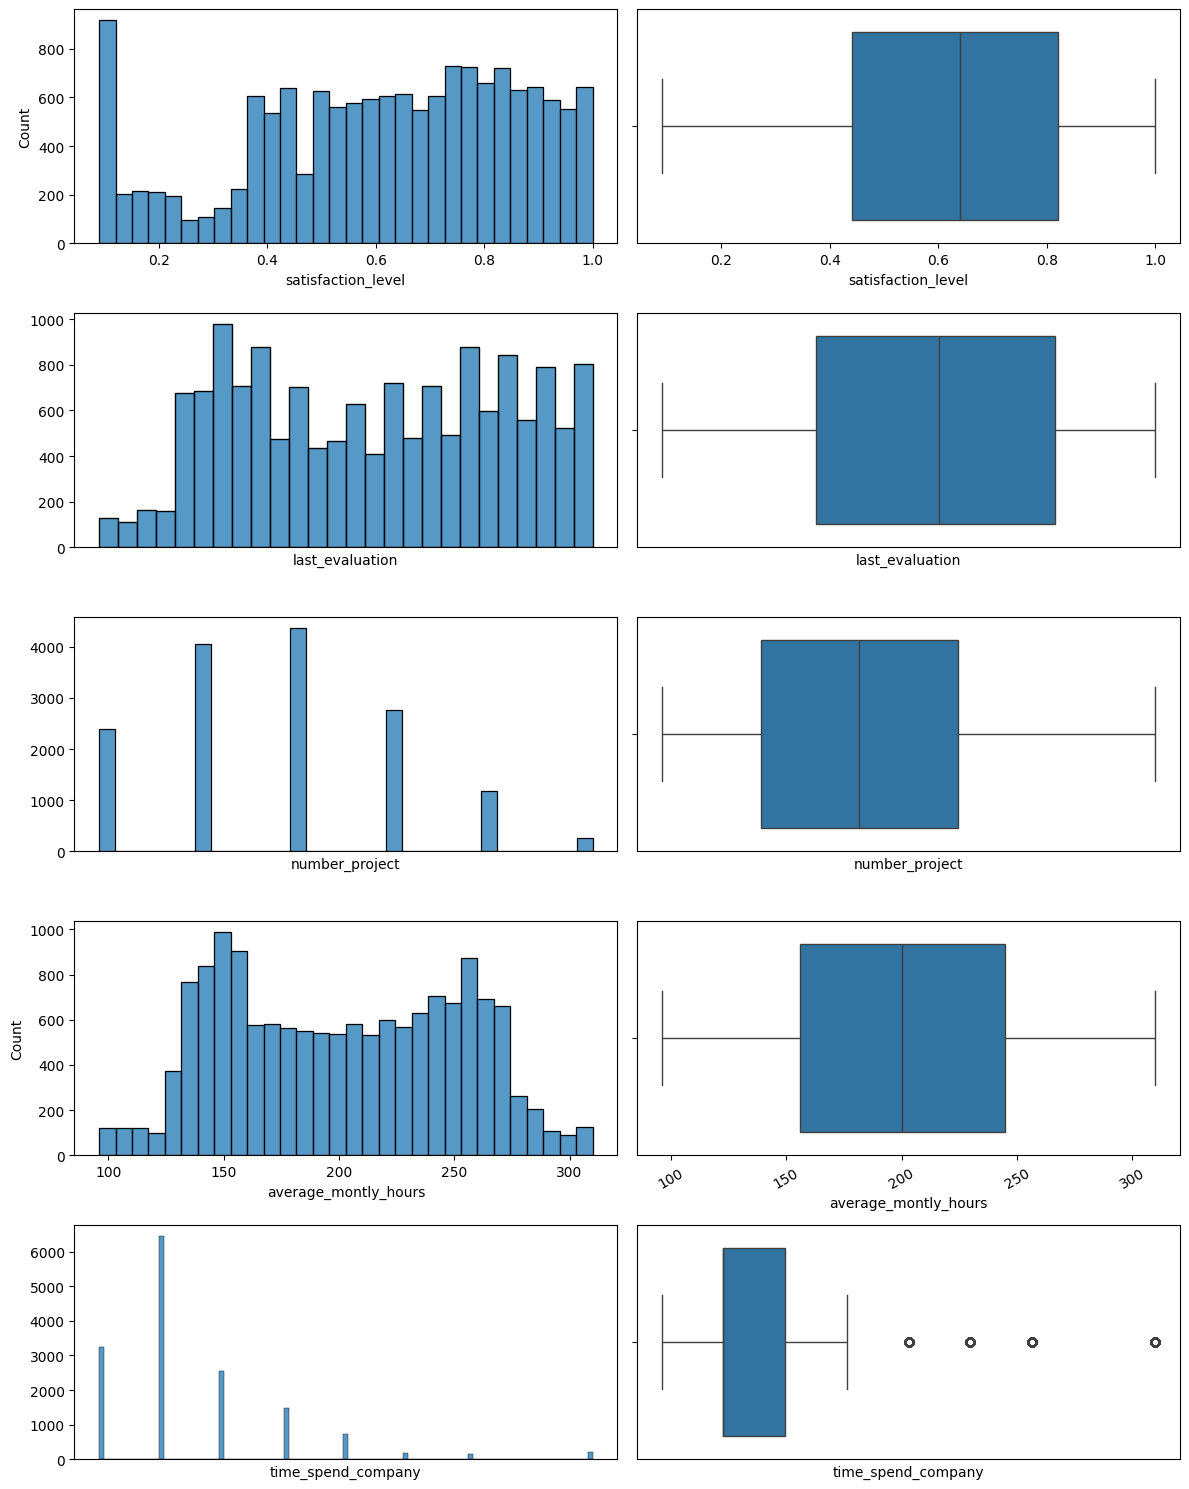

In [59]:
#Analisis univariante Numerico
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 2, figsize=(12, 15)) # Adjusted rows for five variables

sns.histplot(ax=axes[0, 0], data=df, x='satisfaction_level')
sns.boxplot(ax=axes[0, 1], data=df, x='satisfaction_level')

sns.histplot(ax=axes[1, 0], data=df, x='last_evaluation').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[1, 1], data=df, x='last_evaluation').set(ylabel=None, xticks=[])

sns.histplot(ax=axes[2, 0], data=df, x='number_project').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[2, 1], data=df, x='number_project').set(ylabel=None, xticks=[])

sns.histplot(ax=axes[3, 0], data=df, x='average_montly_hours')
sns.boxplot(ax=axes[3, 1], data=df, x='average_montly_hours')
axes[3, 1].tick_params(axis='x', rotation=30) # Rotated x-axis labels

sns.histplot(ax=axes[4, 0], data=df, x='time_spend_company').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[4, 1], data=df, x='time_spend_company').set(ylabel=None, xticks=[])

plt.tight_layout()
plt.show()

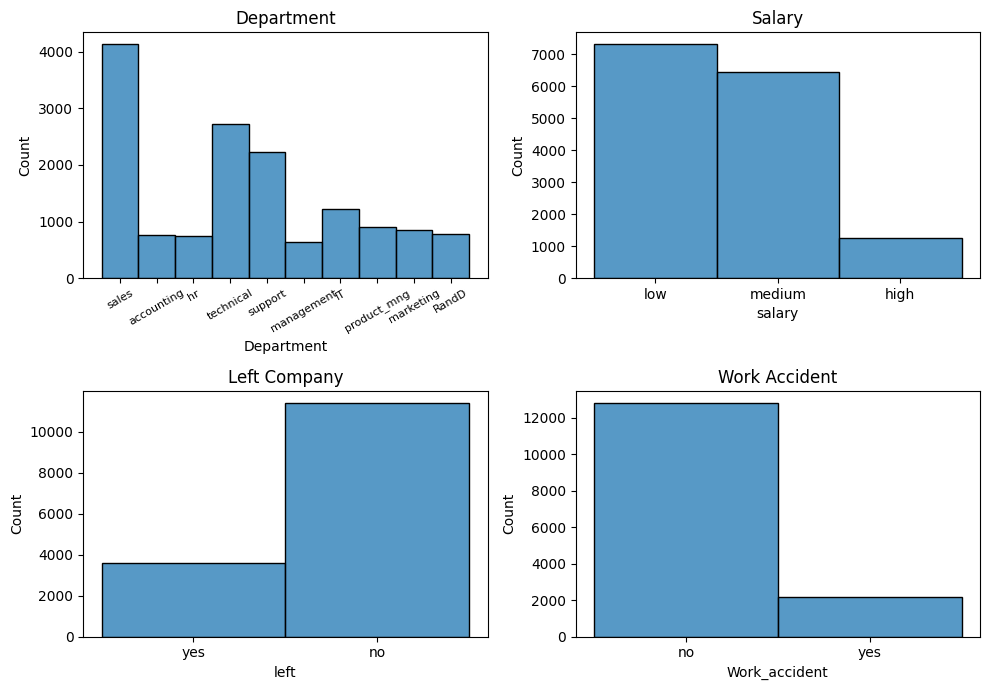

In [60]:
#Analisis univariante Categorico

import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Department
sns.histplot(ax=axes[0, 0], data=df, x='Department')
axes[0, 0].tick_params(axis='x', rotation=30, labelsize=8)
axes[0, 0].set_title('Department')

# Salary
sns.histplot(ax=axes[0, 1], data=df, x='salary')
axes[0, 1].set_title('Salary')

# Left Company (using countplot for categorical data)
sns.histplot(ax=axes[1, 0], data=df, x='left')
axes[1, 0].set_title('Left Company')
axes[1, 0].set_ylabel('Count') # Add a y-axis label

# Work Accident (using countplot for categorical data)
sns.histplot(ax=axes[1, 1], data=df, x='Work_accident')
axes[1, 1].set_title('Work Accident')
axes[1, 1].set_ylabel('Count') # Add a y-axis label

plt.tight_layout()
plt.show()

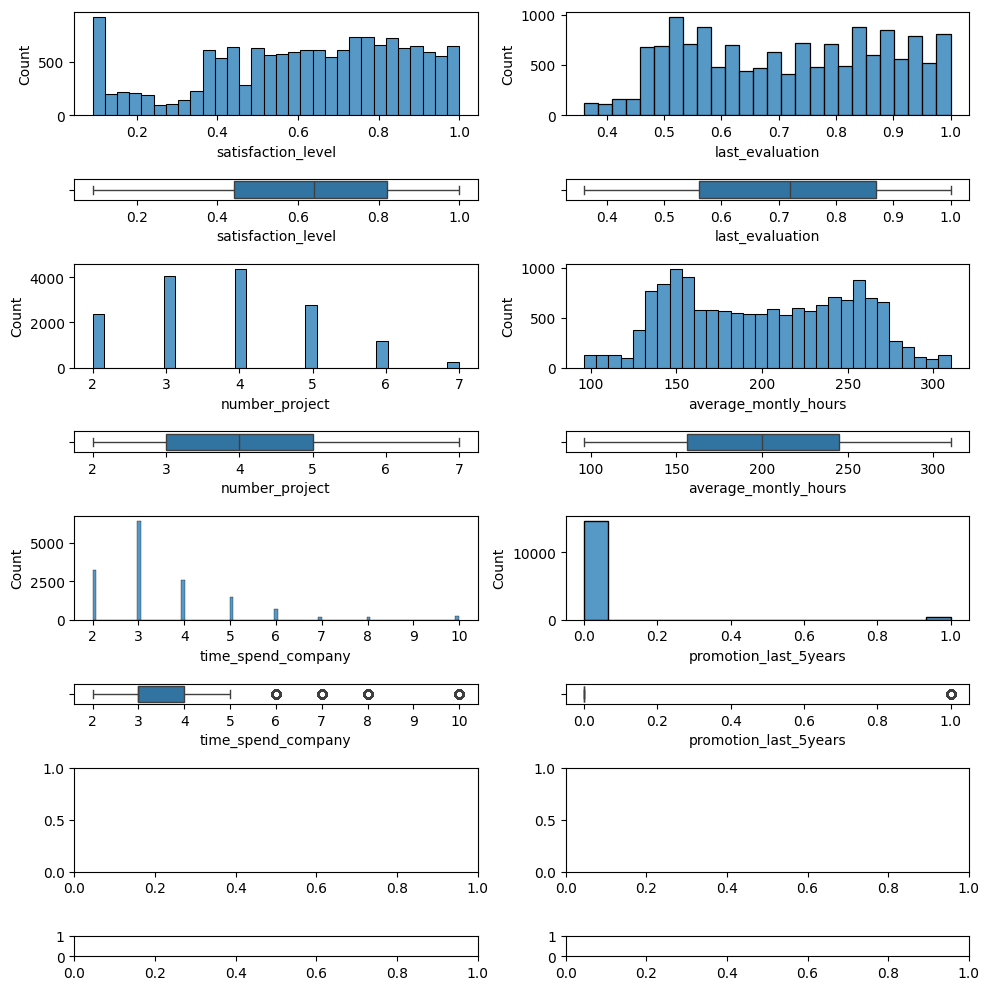

In [67]:
from utils import analisis_numerico_numerico
analisis_numerico_numerico(df, 'time_spend_company')

ValueError: Could not interpret value `l` for `x`. An entry with this name does not appear in `data`.

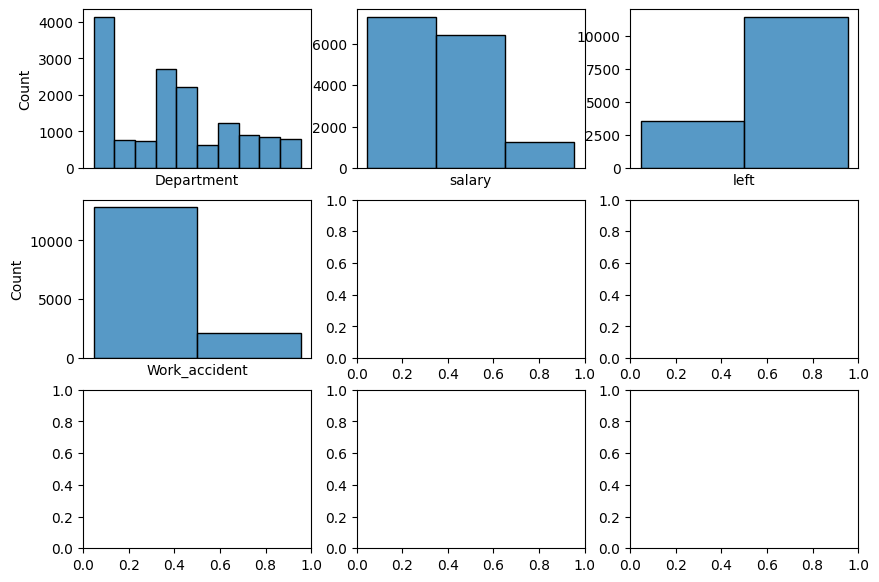

In [63]:
from utils import analisis_categorico_categorico
analisis_categorico_categorico(df,'left')